# Segmentación con KMeans

**Desarrollado por:** Orlando Patricio Chacón Molina

**Fecha de creación:** 2022-02-21

**Fecha de actualización:** 2022-02-23

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
#Leer datos
filename = 'data/cust_seg.csv'
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
data.shape

(850, 10)

In [4]:
data.nunique()

Unnamed: 0         850
Customer Id        850
Age                 37
Edu                  5
Years Employed      33
Income             129
Card Debt          727
Other Debt         788
Defaulted            2
DebtIncomeRatio    245
dtype: int64

In [5]:
data.isna().mean()

Unnamed: 0         0.000000
Customer Id        0.000000
Age                0.000000
Edu                0.000000
Years Employed     0.000000
Income             0.000000
Card Debt          0.000000
Other Debt         0.000000
Defaulted          0.176471
DebtIncomeRatio    0.000000
dtype: float64

In [6]:
data = data.dropna()

In [7]:
# Borrar columnas irrelvantes.
scaledData = data.drop(columns=['Unnamed: 0','Customer Id'])

In [8]:
# Escalar datos
scaler = StandardScaler()
scaledData = scaler.fit_transform(scaledData)

In [9]:
def graphKmeansMultiScater(nClusters):
    # Crear objeto kmeans con el clasificador KMeans()
    # Se establecen 3 grupos
    kmeans = KMeans(n_clusters = nClusters)

    # Entrenamiento con los datos escalados
    kmeans.fit(scaledData)

    # Agregar una columna (cluster) al DataFrame Original 
    data['cluster'] = kmeans.labels_
    print(data.groupby('cluster').count()['Customer Id'].to_frame().rename(columns={'Customer Id':'Fecuencia'}).reset_index())

    # Número máximo de columnas que tendrá el gráfico
    maxColumns = 3
    
    # Combinaciones de dos
    k = 2

    # Cantidad de características
    n = data.shape[1]-3
    # calcular las cantidad de combinaciones de k en n 
    nComb = math.factorial(n) / (math.factorial(n - k) * math.factorial(k))
    
    # Cantidad de filas, basado en la cantidad de combinaciones
    maxRows = math.ceil(nComb/maxColumns)

    # Inicializar el gráfico matplotlib.
    fig, axes = plt.subplots(maxRows, maxColumns, figsize=(16,maxRows * 4))


    # Variabls auxiliares para el conteo de filas y columnas
    row = 0
    col = 0

    # Generar iterativamente todas las combinaciones de gráficos (2 variables)
    for i in range(2, data.shape[1]-2):
        for j in range(i+1, data.shape[1]-1):
            axes[row,col].scatter(data.iloc[:,i], data.iloc[:,j], c = data['cluster'], alpha=0.9, s =5)
            axes[row,col].set_xlabel(data.iloc[:,i].name)
            axes[row,col].set_ylabel(data.iloc[:,j].name)
            axes[row,col].set_title(f'Relation: {data.iloc[:,i].name} - {data.iloc[:,j].name}')
            
            col += 1 # cambio de columna
            # Si se ha llegado a la última columna se retorna a la primera y se crea una fila nueva
            if col >= (maxColumns):
                row += 1
                col = 0

    #Ajustar automáticamente el gráfico
    fig.tight_layout()
    fig.suptitle('Visualización de clustes por pares de variables', y=1.01)
    fig.subplots_adjust(hspace=0.4)

   cluster  Fecuencia
0        0        541
1        1        159


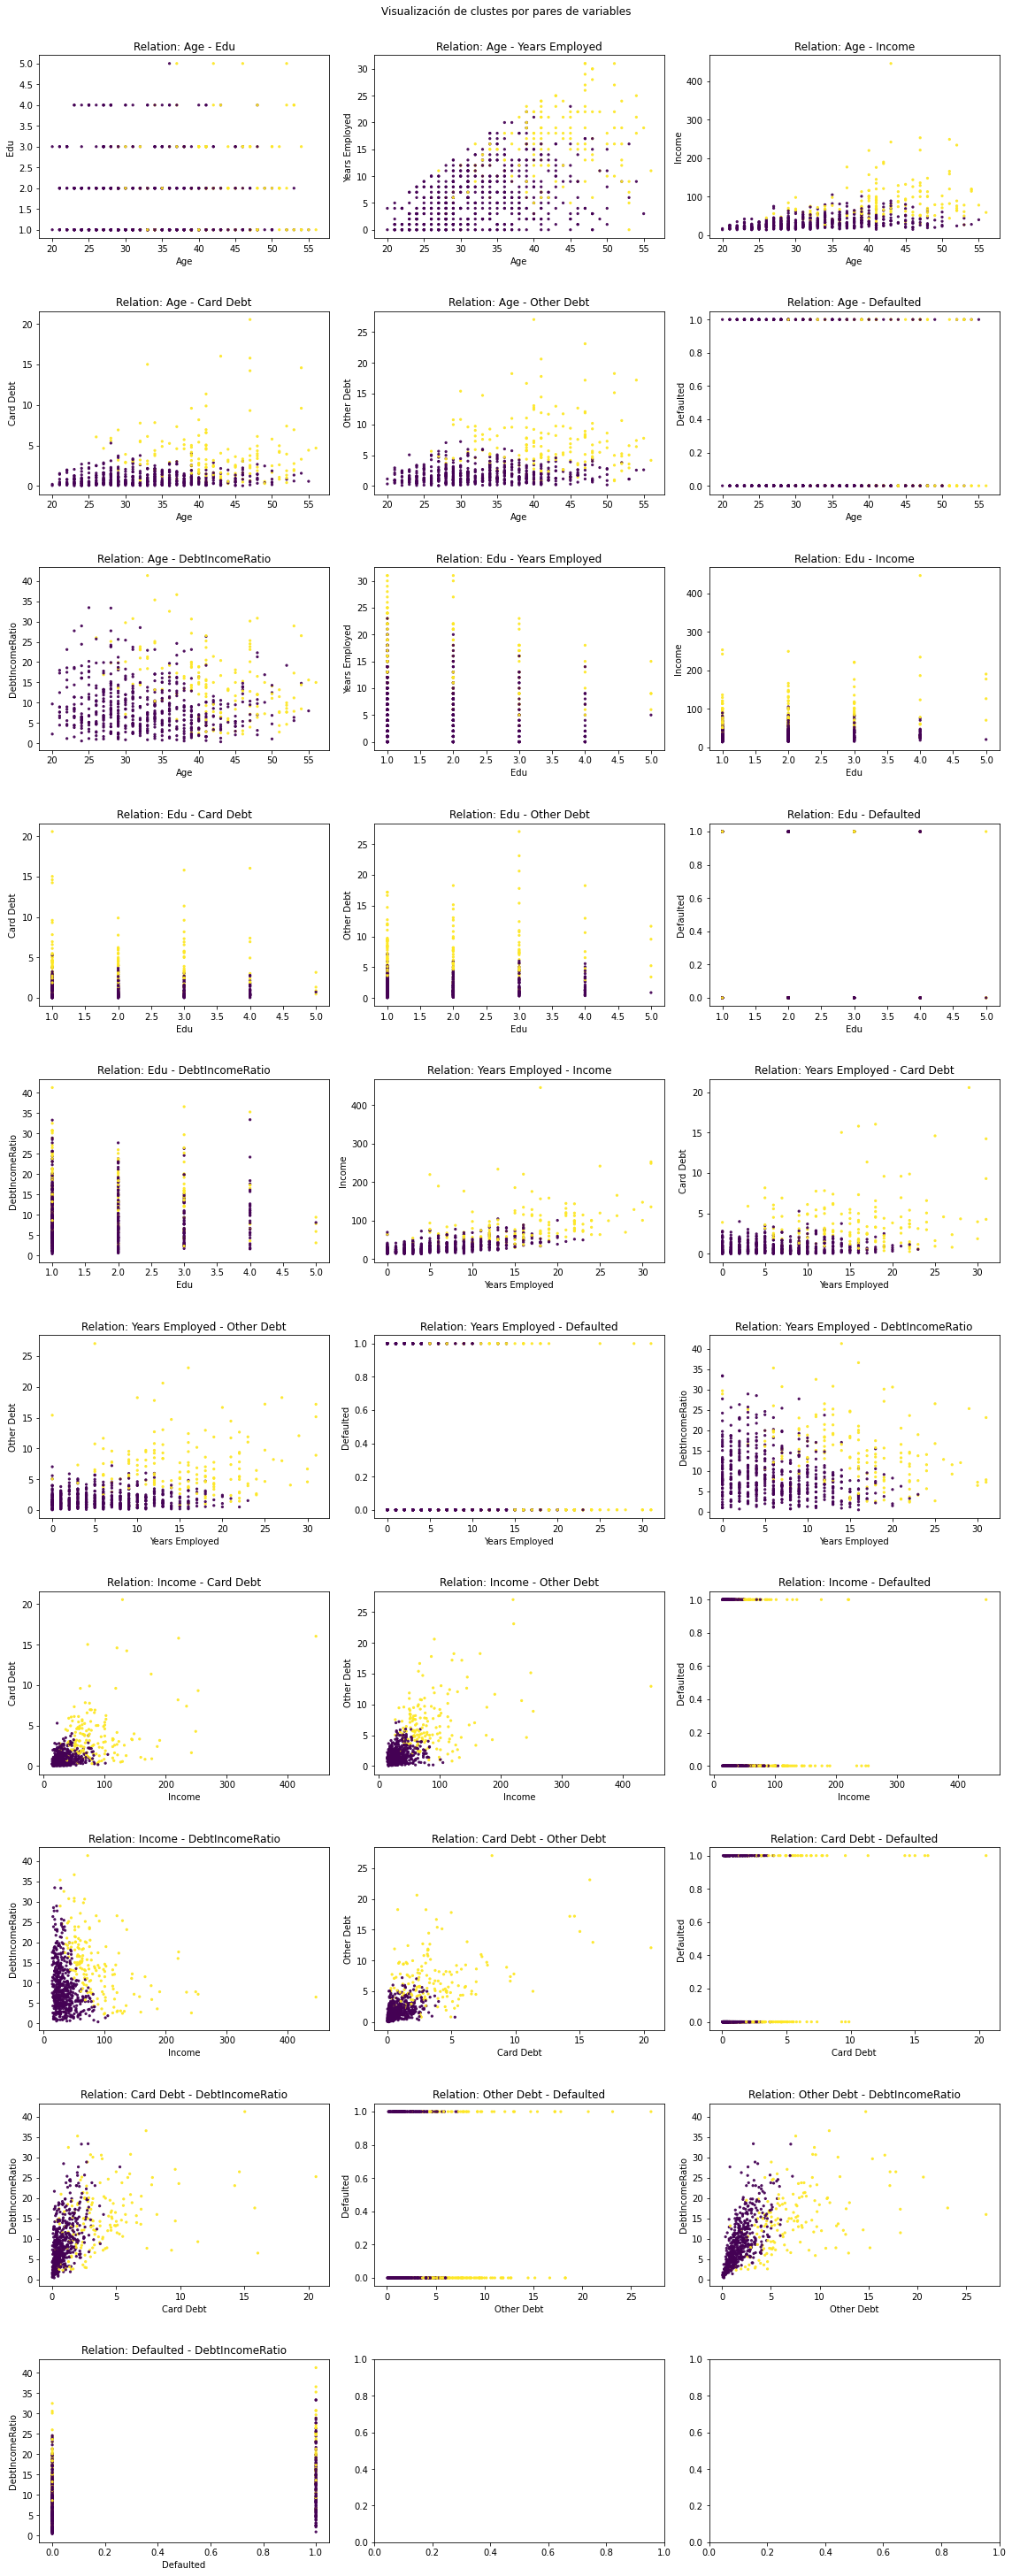

In [10]:
graphKmeansMultiScater(2)

   cluster  Fecuencia
0        0        125
1        1        161
2        2        414


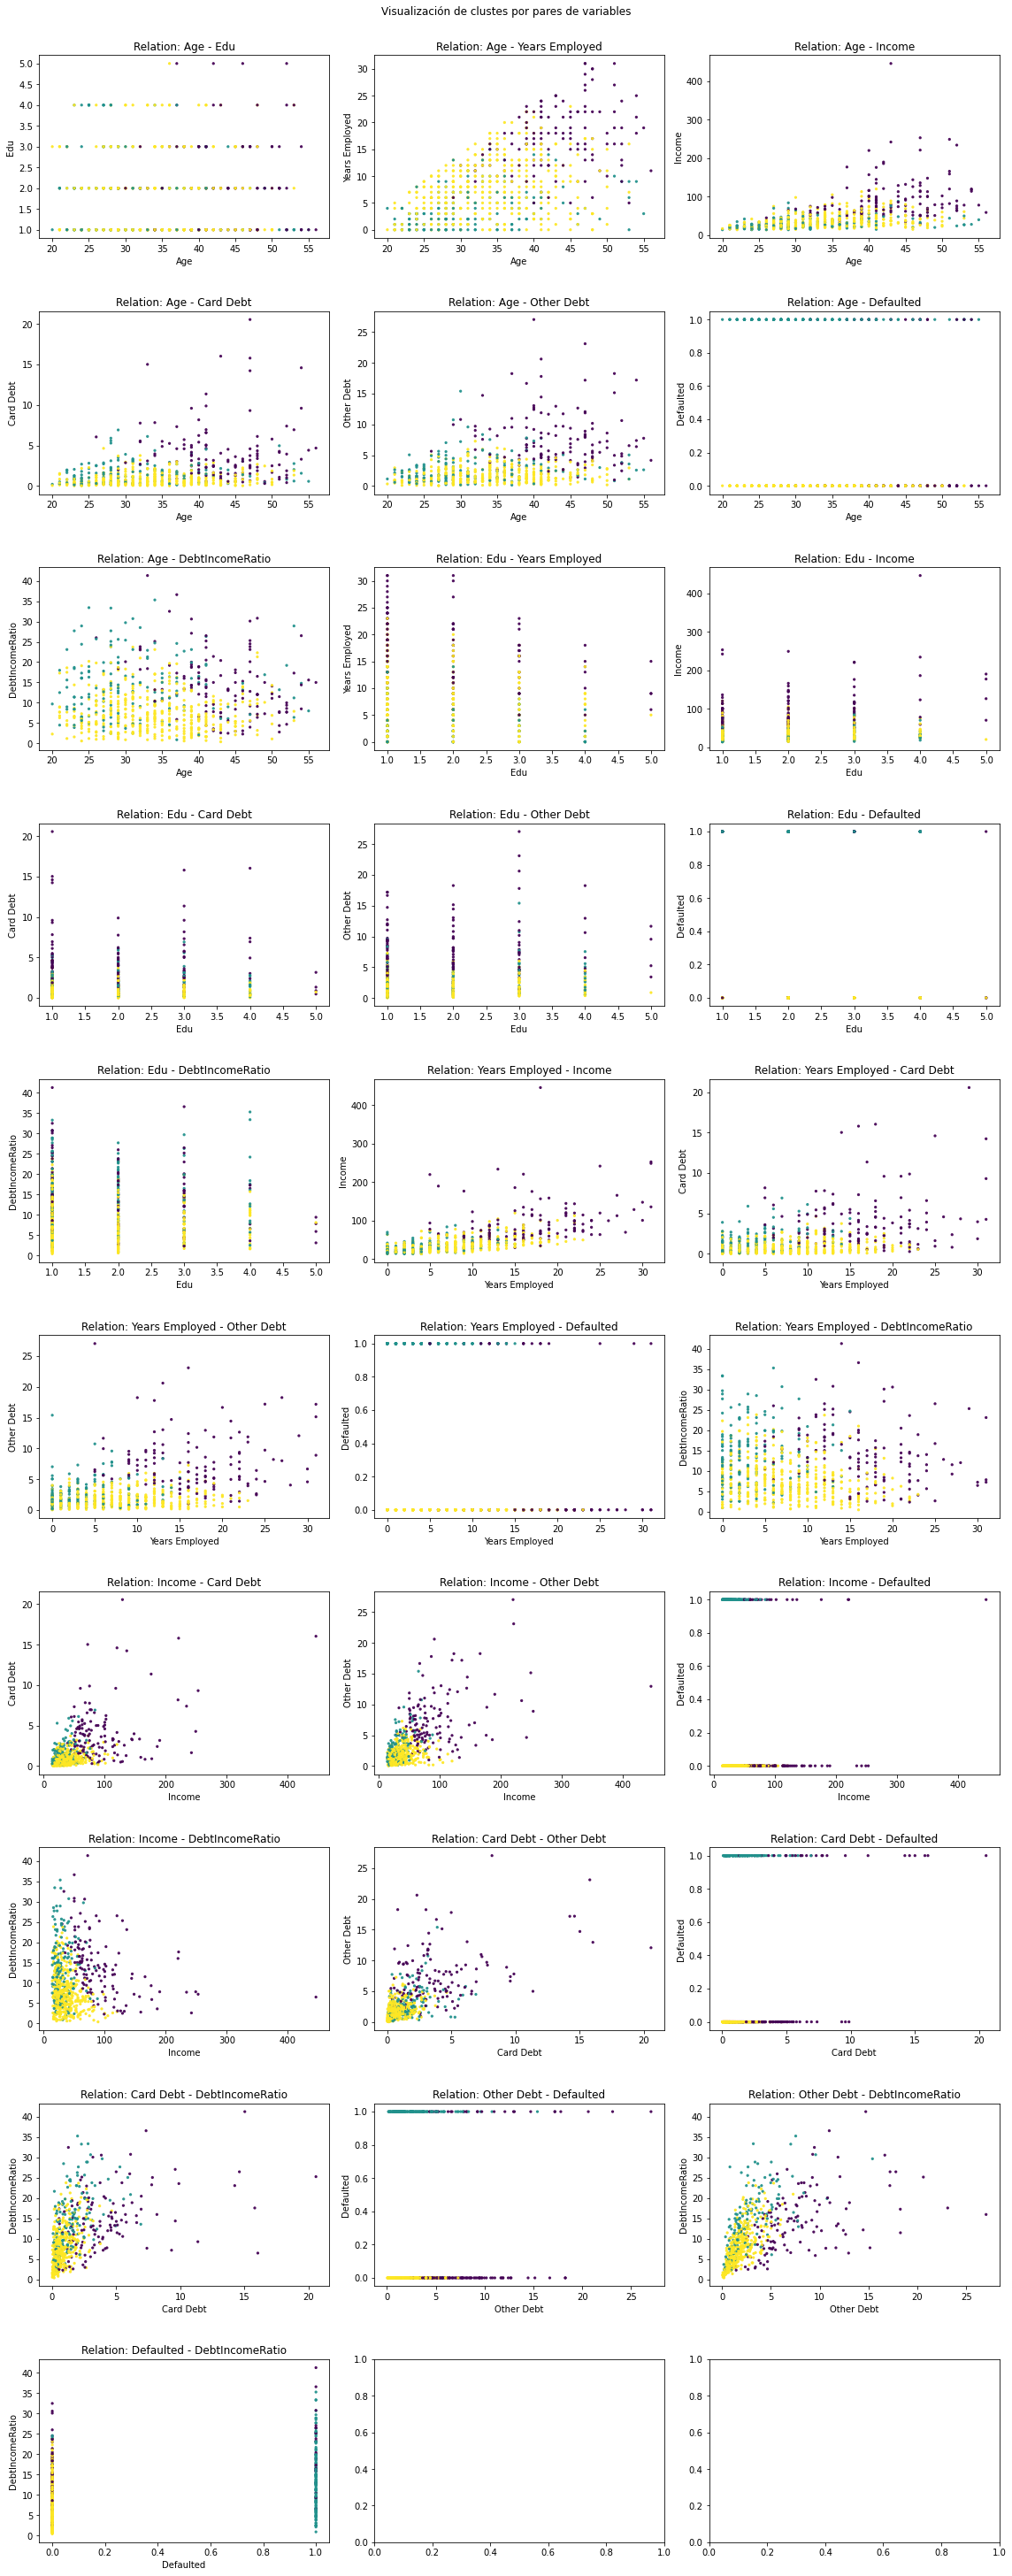

In [11]:
graphKmeansMultiScater(3)

   cluster  Fecuencia
0        0        172
1        1        332
2        2        164
3        3         32


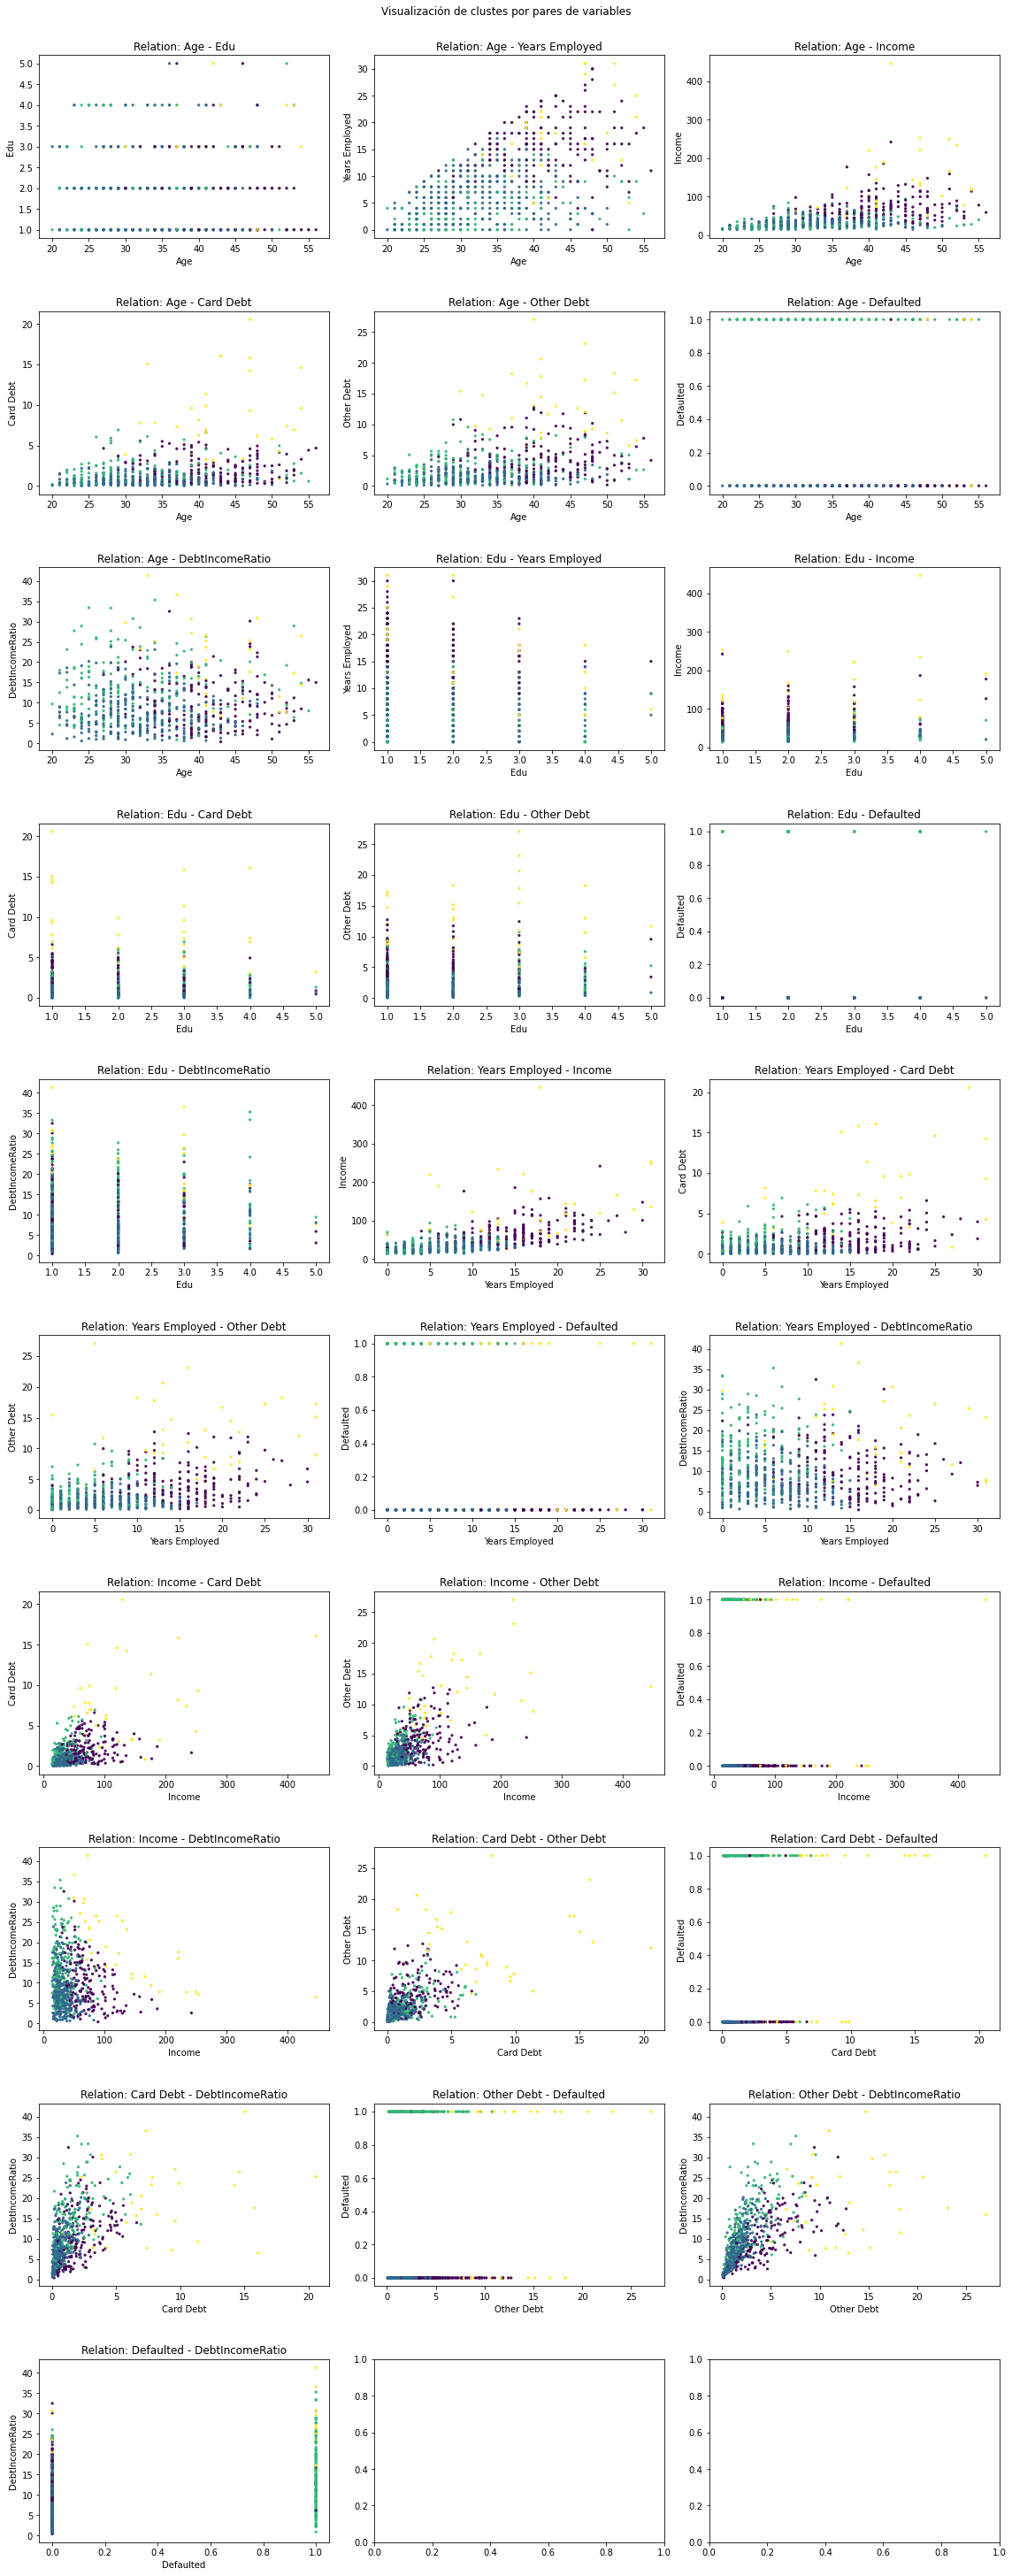

In [12]:
graphKmeansMultiScater(4)

## Variables más relevantes para la segmentación

Luego de generar los gráficos de nube de puntos se puede observar que en la mayoria de los gráficos donde intervienen las varibles: "Card Debt", "Other Debt" e "Income" los grupos pueden apreciarse visualmente. Aparentemente, estas varibales son las que más aportan a la segmentación de este conjunto de datos.

<AxesSubplot:>

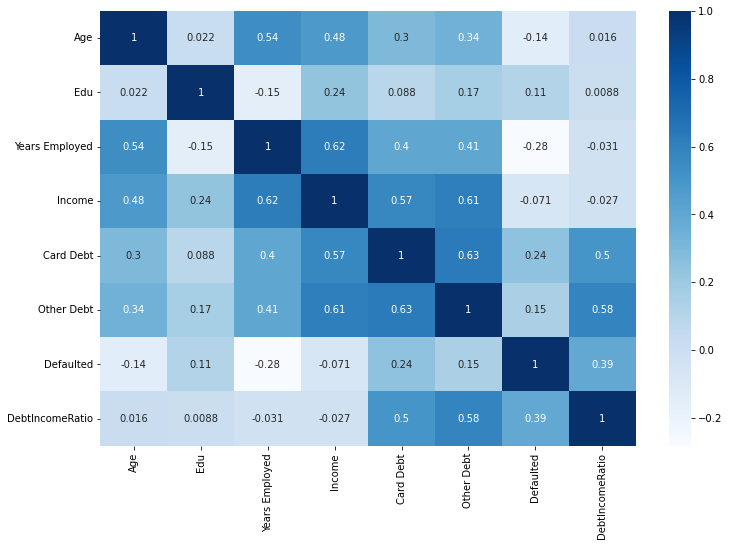

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.heatmap(data.iloc[:,2:-1].corr(), cmap='Blues', annot=True)

De acuerdo a la matriz de correlación, los siguientes pares de variables tiene una corelación alta: 
* $Card\_Debt - Other\_Debt$ , 
* $Years\_Employed - Income$ , 
* $Years\_Employed - Age$
* $Income - (Card-Other)Debt$